In [8]:
import pandas as pd
import seaborn as sns

In [27]:
data = pd.read_csv('C:\\Users\\Lumia520\\Desktop\\Datasets\\HR_data.csv')
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [43]:
# dropping categorical variables to group the numerical variables by the categories in 'left' and caluclating the mean

small = data.drop(['Department', 'salary'], axis = 'columns')
small

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0
...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0
14995,0.37,0.48,2,160,3,0,1,0
14996,0.37,0.53,2,143,3,0,1,0
14997,0.11,0.96,6,280,4,0,1,0


In [44]:
left = small[data.left==1]
left.shape

(3571, 8)

In [45]:
retained = small[data.left==0]
retained.shape

(11428, 8)

In [46]:
grouped_data = small.groupby('left')
grouped_data.mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


From above table we can draw following conclusions,

1. **Satisfaction Level**: Satisfaction level seems to be relatively low (0.44) in employees leaving the firm vs the retained ones (0.66)
2. **Average Monthly Hours**: Average monthly hours are higher in employees leaving the firm (199 vs 207)
3. **Promotion Last 5 Years**: Employees who are given promotion are likely to be retained at firm

Now we'll check the impacked of the dropped (categorical features on the target variable)

<Axes: xlabel='Count', ylabel='salary'>

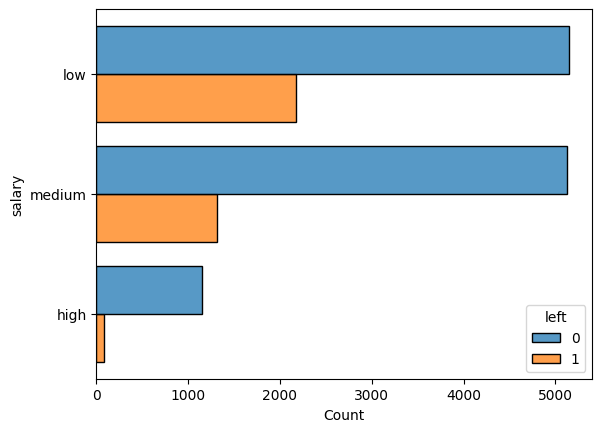

In [34]:
sns.histplot(data, hue = 'left', y = 'salary', multiple= 'dodge', shrink = 0.8)

we can see that mostly people with low salaries leave the company

<Axes: xlabel='Count', ylabel='Department'>

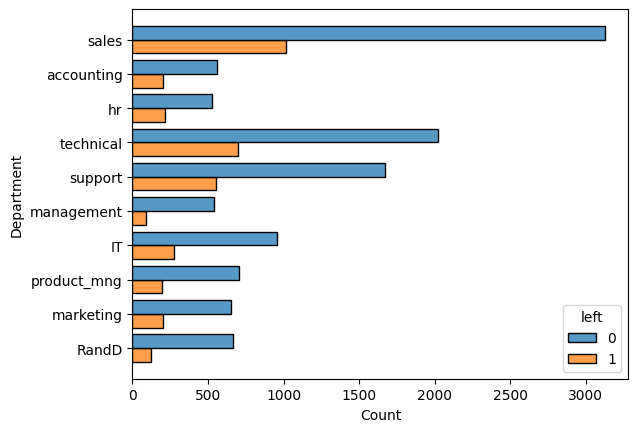

In [32]:
sns.histplot(data, hue = 'left', y = 'Department', multiple= 'dodge', shrink = 0.8)

From above chart there seem to be some impact of department on employee retention but it is not major hence we will ignore department in our analysis

### From the data analysis so far we can conclude that we will use following variables as independant variables in our model

**Satisfaction Level**  
**Average Monthly Hours**  
**Promotion Last 5 Years**  
**Salary**

In [56]:
X = data[['satisfaction_level','average_montly_hours', 'promotion_last_5years', 'salary']]
X

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low
...,...,...,...,...
14994,0.40,151,0,low
14995,0.37,160,0,low
14996,0.37,143,0,low
14997,0.11,280,0,low


In [64]:
# first we convert the salary categorical variable using dummy variables

dummies = pd.get_dummies(data.salary, prefix= 'salary')
dummies

,salary_high,salary_low,salary_medium
0,False,True,False
1,False,False,True
2,False,False,True
3,False,True,False
4,False,True,False
...,...,...,...
14994,False,True,False
14995,False,True,False
14996,False,True,False
14997,False,True,False


In [73]:
data_with_dummies = pd.concat([X,dummies], axis = 'columns')
data_with_dummies

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,False,True,False
1,0.80,262,0,medium,False,False,True
2,0.11,272,0,medium,False,False,True
3,0.72,223,0,low,False,True,False
4,0.37,159,0,low,False,True,False
...,...,...,...,...,...,...,...
14994,0.40,151,0,low,False,True,False
14995,0.37,160,0,low,False,True,False
14996,0.37,143,0,low,False,True,False
14997,0.11,280,0,low,False,True,False


In [74]:
data_with_dummies = data_with_dummies.drop('salary', axis = 'columns')
data_with_dummies

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,False,True,False
1,0.80,262,0,False,False,True
2,0.11,272,0,False,False,True
3,0.72,223,0,False,True,False
4,0.37,159,0,False,True,False
...,...,...,...,...,...,...
14994,0.40,151,0,False,True,False
14995,0.37,160,0,False,True,False
14996,0.37,143,0,False,True,False
14997,0.11,280,0,False,True,False


In [66]:
y = data.left
y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [88]:
X_train, X_test, y_train, y_test = train_test_split(data_with_dummies, y, test_size=0.1)

In [89]:
X_train

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
13882,0.71,140,0,False,False,True
4512,0.54,228,1,False,False,True
1032,0.84,237,0,False,True,False
3176,0.56,220,0,False,False,True
6446,0.69,228,0,False,False,True
...,...,...,...,...,...,...
639,0.43,153,0,False,True,False
11381,0.37,121,0,False,True,False
12424,0.45,130,0,False,True,False
4069,0.83,232,0,False,True,False


In [90]:
model = LogisticRegression()
model.fit(X_train,y_train)

c:\Users\Lumia520\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [91]:
model.predict(X_test)

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [92]:
y_test

2949     0
7916     0
2321     0
6079     0
5438     0
        ..
14415    1
1743     1
5586     0
2452     0
9920     0
Name: left, Length: 1500, dtype: int64

In [93]:
model.score(X_test, y_test)

0.7833333333333333

the model is 78.3% accurate